# S03 T02 Visualització gràfica de Múltiples variables

## Exercici 1

GitHub *03 EXAMINING DATA* amb seaborn i el dataset [Tips](https://github.com/IT-Academy-BCN/Data-Science/tree/main/Data-sources) 

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [350]:

url = 'https://raw.githubusercontent.com/IT-Academy-BCN/Data-Science/main/Data-sources/tips.csv'
df = pd.read_csv(url, delimiter=",", decimal=".", encoding='utf8')
df.sample(3)

,total_bill,tip,sex,smoker,day,time,size
51,10.29,2.60,Female,No,Sun,Dinner,2
230,24.01,2.00,Male,Yes,Sat,Dinner,4
116,29.93,5.07,Male,No,Sun,Dinner,4


In [3]:
# Número d'observacions en el conjunt de dades:
print('Número de observaciones: ', df.shape)


Número de observaciones:  (244, 7)


In [6]:
df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)
df[df.select_dtypes(np.int64).columns] = df.select_dtypes(np.int64).astype(np.int32)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float32
 1   tip         244 non-null    float32
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int32  
dtypes: float32(2), int32(1), object(4)
memory usage: 10.6+ KB


### Visualització de la variable numèrica: **total_bill**

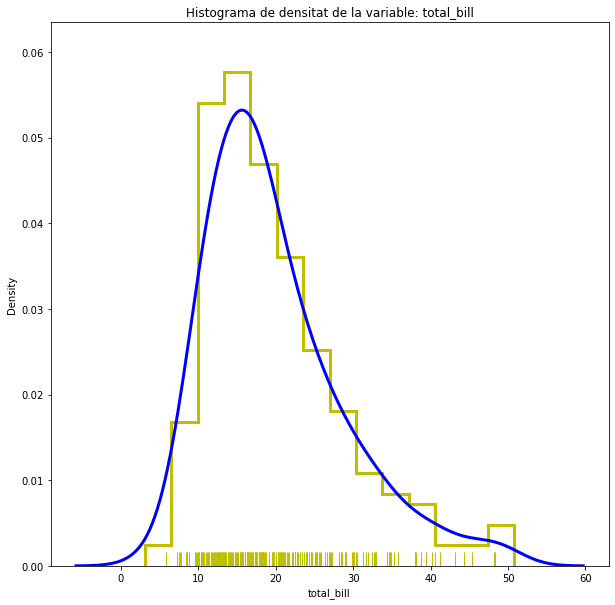

In [11]:

total_amount = df['total_bill'] 

title = 'Histograma de densitat de la variable: total_bill'

plt.figure(figsize=(10,10))
ax = sns.distplot(total_amount, rug=True, rug_kws={"color": "y"},
                  kde_kws={"color": "b", "lw": 3, "label": "TOTAL BILL"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "y"}).set_title(title)
plt.show()

### Visualització de la variable numèrica: **tips**

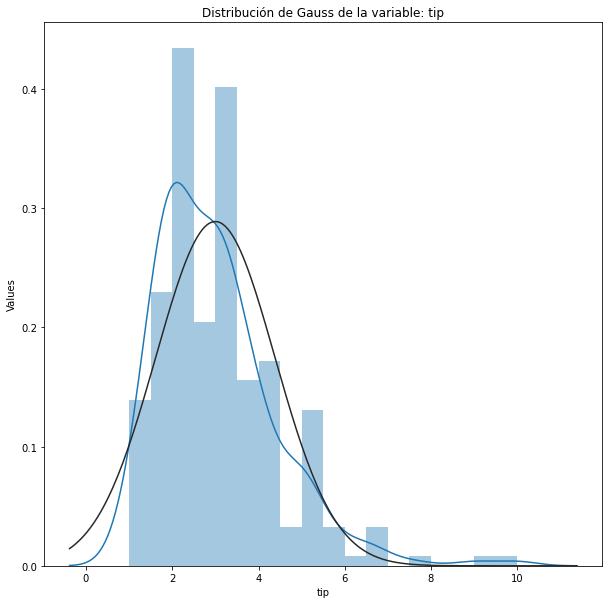

In [13]:
from scipy.stats import norm

tips = df['tip'] 

plt.figure(figsize=(10,10))
title = 'Distribución de Gauss de la variable: tip'
ax = sns.distplot(tips, fit=norm, kde=True)
ax.set(xlabel="tip", ylabel='Values', title=title)

plt.show()

### Visualització de les variables numèriques: total_bill i tip

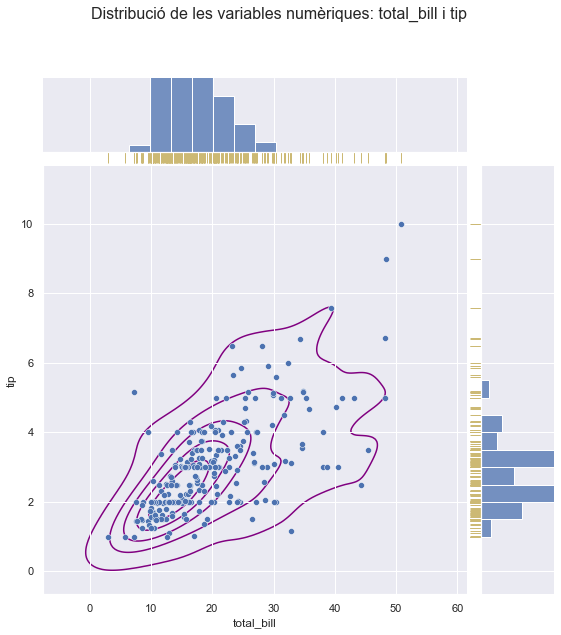

In [21]:
numerics = df.loc[:,['total_bill', 'tip']] 

sns.set(rc={'figure.figsize':(10, 10)})

g = sns.jointplot(data=numerics, x='total_bill', y='tip', height=8)
g.fig.suptitle('Distribució de les variables numèriques: total_bill i tip', fontsize=16,  y=1.1)
g.plot_joint(sns.kdeplot, color='purple', zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color='y', height=-.15, clip_on=False)

plt.show()

### Visualització de dos variables numèriques i una categòrica: total_bill, tip i size

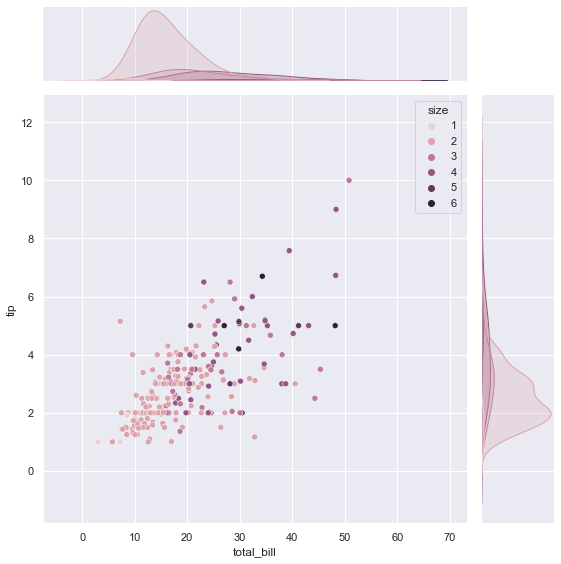

In [35]:
num_cat = df.loc[:,['total_bill', 'tip', 'size']]

sns.set(rc={'figure.figsize':(10, 10)})
title = "Distribució de les variables numèriques i categòrica: size"
sns.jointplot(data=num_cat, x='total_bill', y='tip', hue='size', height=8)
fig.suptitle(title, fontsize=16,  y=1.1)

plt.show()

### Visualització de les variables i la categòrica: sex

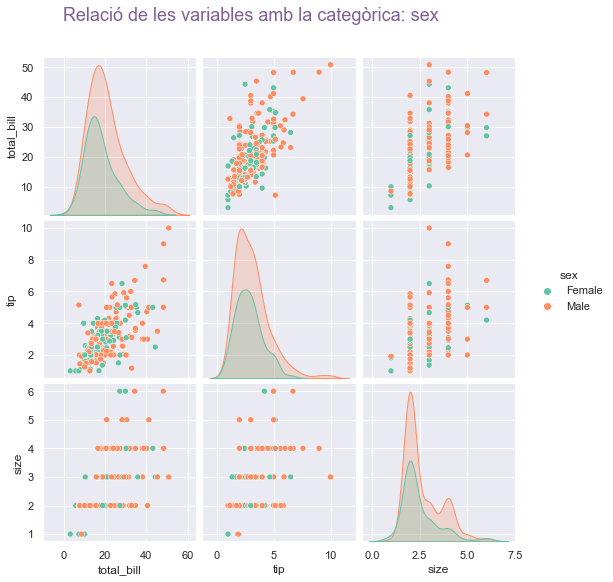

In [38]:

sns.set(rc={'figure.figsize':(12, 12)})
title = "Relació de les variables amb la categòrica: sex"
sns.pairplot(df, hue = "sex", palette="Set2")
plt.title(title, fontsize=18, color='#61387a', alpha=0.8, ha='right', pad=200)
plt.show()


### Visualització de dues variebles categòriques: day, sex i una numèrica: total_bill

Text(0.5, 1.1, 'Relació de les variables amb la categòrica: sex i day')

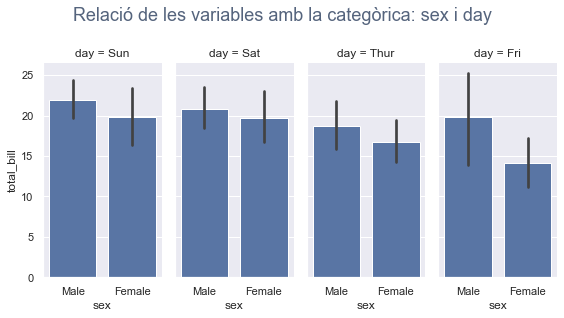

In [45]:

sns.set(rc={'figure.figsize':(12, 12)})
title = "Relació de les variables amb la categòrica: sex i day"
g = sns.FacetGrid(df, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"])
g.fig.suptitle(title, fontsize=18,  color='#2a3d5c', alpha=0.8, ha='center', y=1.1)

### Visualització de la variable categòrica: day

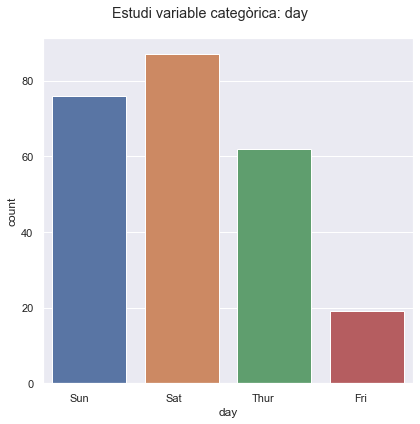

In [47]:
plt.rcParams["figure.figsize"] = [6, 6]
plt.rcParams["figure.autolayout"] = True

ax = sns.countplot(x='day', data=df)
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right')
ax.figure.suptitle('Estudi variable categòrica: day')

plt.show()

### Visualització variables categòriques day & sex

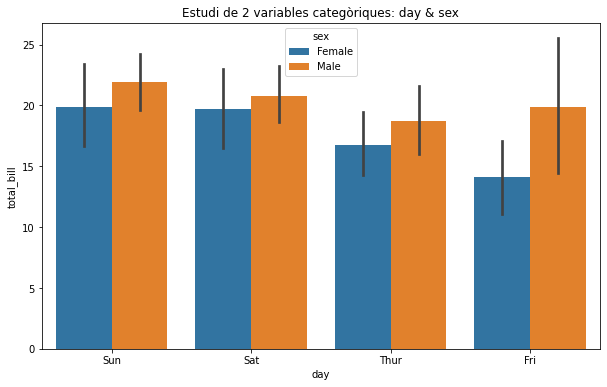

In [19]:
cat1 = df[["day", "total_bill", "sex"]]

title ='Estudi de 2 variables categòriques: day & sex'
plt.figure(figsize=(10,6))
sns.barplot(x="day", y="total_bill", hue="sex", data=cat1).set(title=title)

plt.show()

### Visualització variables categoriques: day & smoker

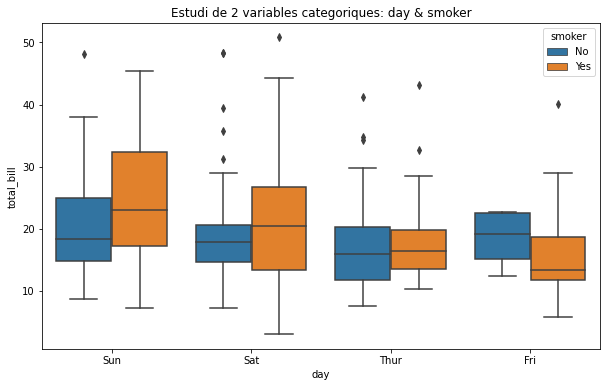

In [21]:
cat2 = df[["day", "total_bill", "smoker"]]

title = 'Estudi de 2 variables categoriques: day & smoker'
plt.figure(figsize=(10,6))
sns.boxplot(x = "day", y = "total_bill", data=cat2, hue = "smoker").set(title=title)

plt.show()


### Visualització de la relació de la variables Tips

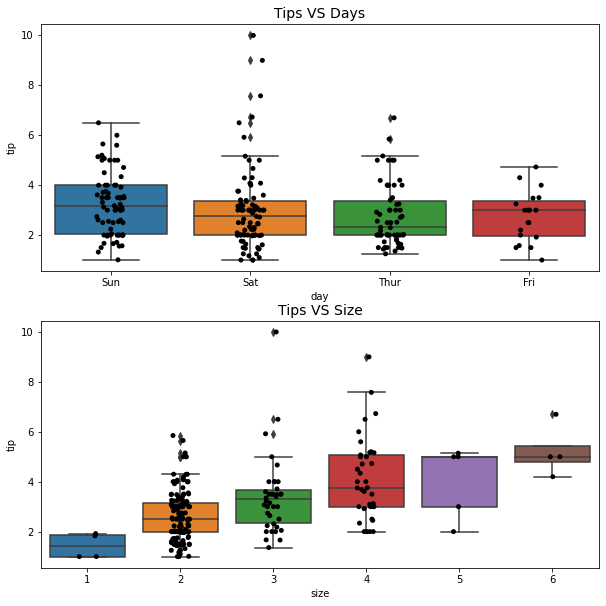

In [24]:
cat3 = df[["day", "tip"]]

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.stripplot(x="day", y="tip", data=df, color="black")
sns.boxplot(x="day", y="tip", data=df).set_title("Tips VS Days", fontsize=14)


cat4 = df[["tip", "size"]]

plt.subplot(2,1,2)
sns.stripplot(x="size", y="tip", data=df, color="black")
sns.boxplot(x="size", y="tip", data=df).set_title("Tips VS Size", fontsize=14)

plt.show()

### Visualització: Diagrama H-R

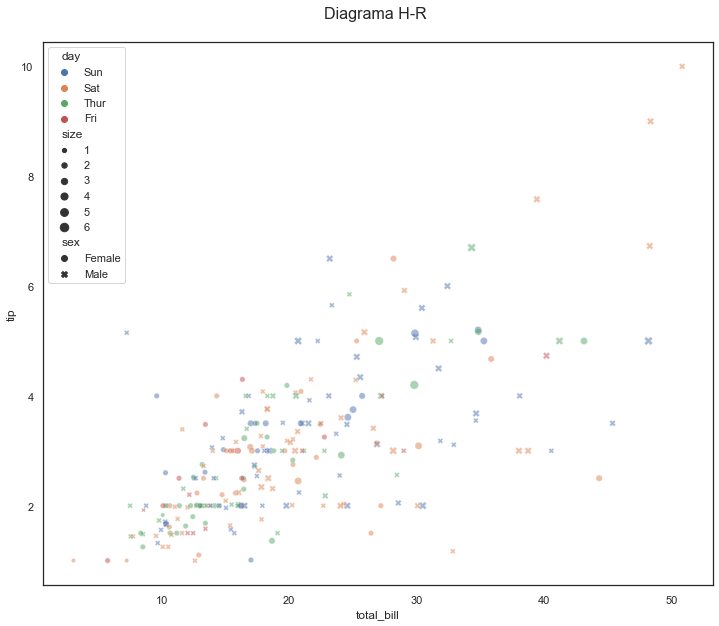

In [26]:

sns.set(rc={'figure.figsize':(12, 10)})

sns.set_style("white")
sns.scatterplot(data = df, x="total_bill", y="tip" , hue= "day" , size="size", 
            style="sex" , alpha= 0.5 ).set_title(u'Diagrama H-R \n', fontsize=16)
       
plt.show()

 ### Visualització diagrama de Violin

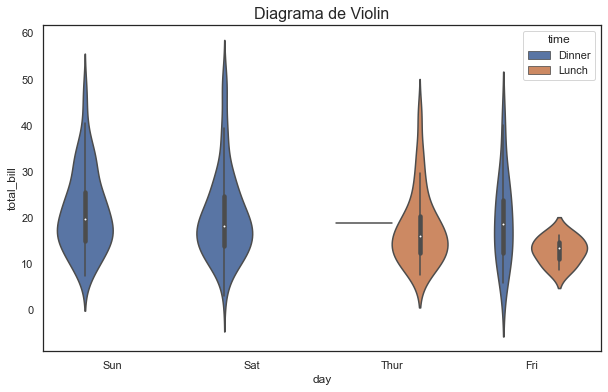

In [29]:
cat5 = df[["day", "total_bill", "time"]]

plt.figure(figsize=(10,6))
sns.violinplot(x="day", y="total_bill", hue="time", data=cat5).set_title(u'Diagrama de Violin', fontsize=16)
plt.show()

### Visualització de 4 variables

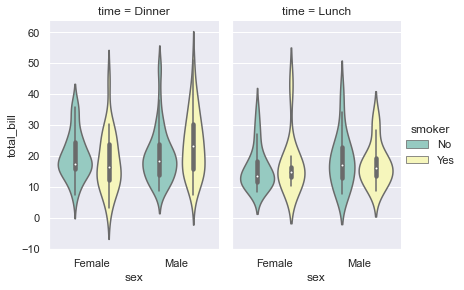

In [41]:
cat5 = df[["sex", "total_bill", "smoker", "time"]]

sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=cat5, kind="violin",
                height=4, aspect=.7, palette="Set3")
plt.show()

### Visualització de la relació entre totes variables

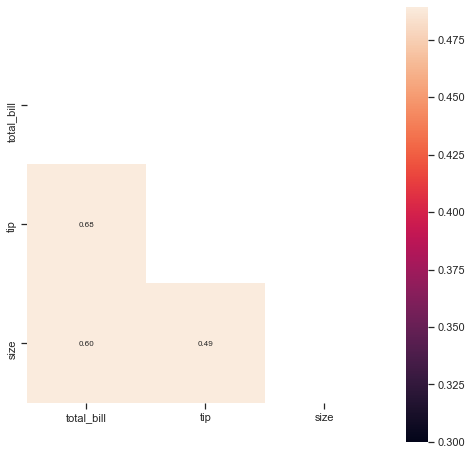

In [42]:

corr = df.corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('ticks'):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', annot_kws={'size': 8}, vmax=.3, square=True)


## Exercici 2

Dataset que disposem en el repositori de GitHub *PRE-PROCESSING-DATA*, [Movies](https://github.com/IT-Academy-BCN/Data-Science/tree/main/Pre-processing-data)

In [357]:
url = 'https://raw.githubusercontent.com/IT-Academy-BCN/Data-Science/main/Pre-processing-data/movies.dat'
df = pd.read_csv(url, delimiter="::", decimal=".", header=None, names = ['Id','Title', 'Genres'], engine='python').set_index('Id')
df.sample(3)

,Title,Genres
Id,,
1545,Ponette (1996),Drama
2732,Jules and Jim (Jules et Jim) (1961),Drama
3125,"End of the Affair, The (1999)",Drama


In [358]:
import re

expres = r'(([0-9]{4}))'

df['Year'] = df['Title'].apply(lambda x: int(re.search(expres, x).group()))

expres = r" +\(.*\)"
df['Title'] = df['Title'].apply(lambda x: re.sub(expres, "", x))

df.sample(3)

,Title,Genres,Year
Id,,,
737,Barb Wire,Action|Sci-Fi,1996
3339,Cross of Iron,War,1977
2907,Superstar,Comedy,1999


In [359]:
df['Genres'] = df.Genres.str.replace(r'[|]', " ", regex=True)
expres = r" +\(.*\)"
df['Title'] = df['Title'].apply(lambda x: re.sub(expres, "", x))

df.head(3)

,Title,Genres,Year
Id,,,
1,Toy Story,Animation Children's Comedy,1995
2,Jumanji,Adventure Children's Fantasy,1995
3,Grumpier Old Men,Comedy Romance,1995


In [360]:
df['Genres'] = df['Genres'].apply(lambda x: re.sub("\'|[s]", "", x))
df.head(3)

,Title,Genres,Year
Id,,,
1,Toy Story,Animation Children Comedy,1995
2,Jumanji,Adventure Children Fantay,1995
3,Grumpier Old Men,Comedy Romance,1995


In [5]:
pip install wordcloud

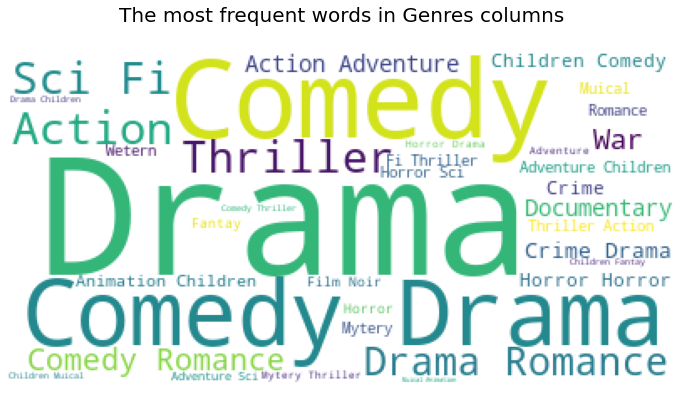

In [102]:
from wordcloud import WordCloud

df_word = df.copy()

df_word['Genres'].dropna(how='all', inplace=True) 
films_Genres = " ".join(txt for txt in df_word.Genres)

plt.figure(figsize=(12,8))
wordcloud = WordCloud(background_color='white', prefer_horizontal=1).generate(films_Genres)
plt.title('The most frequent words in Genres columns', fontsize=20, pad=30)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [361]:
df_dumi = df.Genres.str.get_dummies(sep =" ")
df_dumi.sample(3)

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantay,Film-Noir,Horror,Muical,Mytery,Romance,Sci-Fi,Thriller,War,Wetern
Id,,,,,,,,,,,,,,,,,,
3411,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1176,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1370,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [362]:
df_dum = pd.concat([df, df_dumi],  axis=1, join='inner')
df.head(3)

,Title,Genres,Year
Id,,,
1,Toy Story,Animation Children Comedy,1995
2,Jumanji,Adventure Children Fantay,1995
3,Grumpier Old Men,Comedy Romance,1995


In [363]:
df_dum[df_dum.select_dtypes(np.int64).columns] = df_dum.select_dtypes(np.int64).astype(np.int32)
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        3883 non-null   object
 1   Genres       3883 non-null   object
 2   Year         3883 non-null   int32 
 3   Action       3883 non-null   int32 
 4   Adventure    3883 non-null   int32 
 5   Animation    3883 non-null   int32 
 6   Children     3883 non-null   int32 
 7   Comedy       3883 non-null   int32 
 8   Crime        3883 non-null   int32 
 9   Documentary  3883 non-null   int32 
 10  Drama        3883 non-null   int32 
 11  Fantay       3883 non-null   int32 
 12  Film-Noir    3883 non-null   int32 
 13  Horror       3883 non-null   int32 
 14  Muical       3883 non-null   int32 
 15  Mytery       3883 non-null   int32 
 16  Romance      3883 non-null   int32 
 17  Sci-Fi       3883 non-null   int32 
 18  Thriller     3883 non-null   int32 
 19  War          3883 non-null 

### Valors atípics

In [364]:
df_dum['Year'].describe()

count    3883.000000
mean     1989.646150
std       152.621018
min      1600.000000
25%      1982.000000
50%      1994.000000
75%      1997.000000
max      9000.000000
Name: Year, dtype: float64

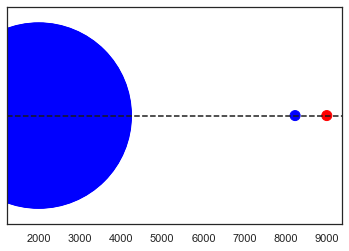

In [365]:
Year_unique, counts = np.unique(df_dum['Year'], return_counts=True)
sizes = counts*100
colors = ['blue']*len(Year_unique)
colors[-1] = 'red'
 
plt.axhline(1, color='k', linestyle='--')
plt.scatter(Year_unique, np.ones(len(Year_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

In [366]:
out_fin = df_dum['Year'].loc[df_dum['Year']>2000]
out_ini = df_dum['Year'].loc[df_dum['Year']<1919]

print(out_fin)
print(out_ini)

Id
671     3000
924     2001
2308    9000
2311    2010
3845    8230
Name: Year, dtype: int32
Id
1422    1600
2691    1900
Name: Year, dtype: int32


In [367]:
df_dum.loc[(df_dum.Year == 2001) | (df_dum.Year == 2010) | (df_dum.Year == 3000) | (df_dum.Year ==  8230) 
               | (df_dum.Year ==  9000),'Year']=2000

df_dum.loc[(df_dum.Year == 1600) | (df_dum.Year == 1900),'Year']=1919

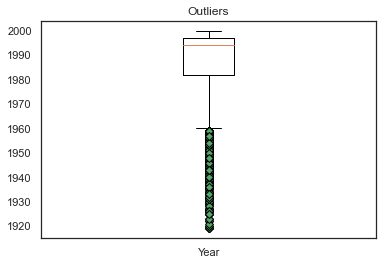

In [368]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Outliers')
ax.boxplot(df_dum['Year'], flierprops=green_diamond, labels=['Year'])
plt.show()

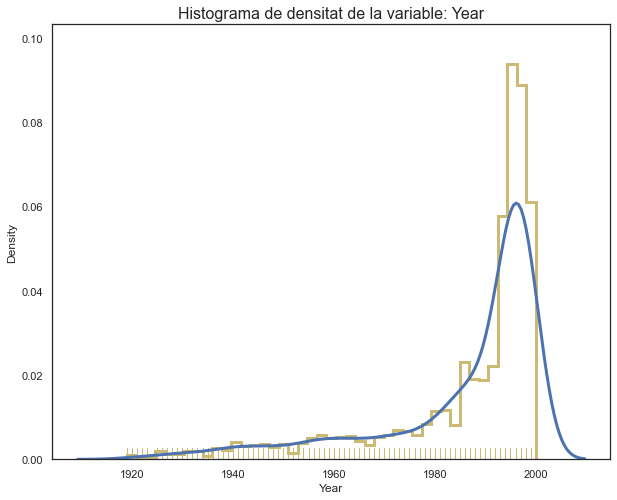

In [369]:
year_dens = df_dum['Year'] 

title = 'Histograma de densitat de la variable: Year'

plt.figure(figsize=(10,8))
ax = sns.distplot(year_dens, rug=True, rug_kws={"color": "y"},
                  kde_kws={"color": "b", "lw": 3, "label": "YEAR"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "y"}).set_title(title, fontsize =16)

plt.show()

### Métode de rang interquartílic

In [164]:
from scipy import stats

In [370]:
q1 = df_dum['Year'].quantile(0.25)
q3 = df_dum['Year'].quantile(0.75)
iqr = q3-q1 
Q25  = q1-1.5*iqr
Q75 = q3+1.5*iqr
df_iqr = df_dum.loc[(df_dum['Year']> Q25) & (df_dum['Year']< Q75)]

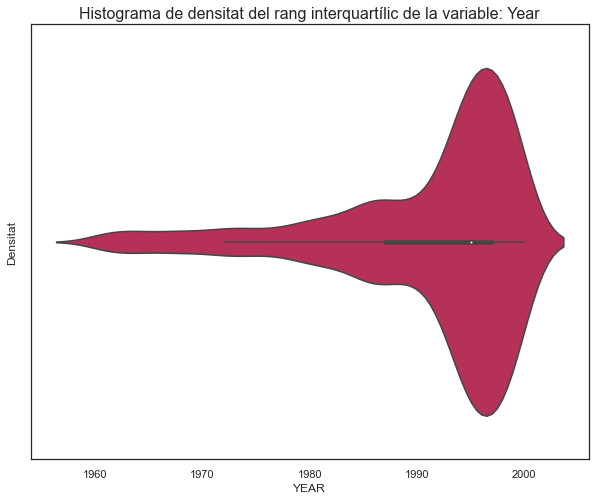

In [371]:
df_dens2 = df_iqr['Year']

title = 'Histograma de densitat del rang interquartílic de la variable: Year'

plt.figure(figsize=(10,8))
ax = sns.violinplot(df_dens2, x='Year', palette='rocket').set_title(title, fontsize =16)
plt.xlabel('YEAR')
plt.ylabel('Densitat')

plt.show()

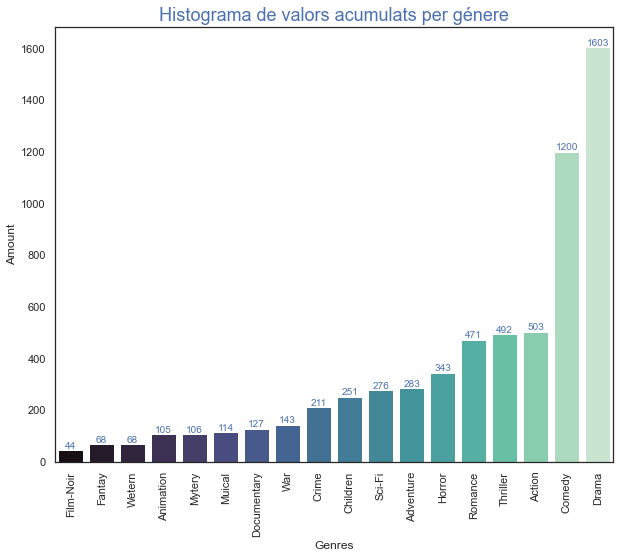

In [373]:
data = df_dumi.apply(np.sum).sort_values()

plt.figure(figsize=(10, 8))
sns.set_style('white')
sns.barplot(x=data.index, y=data.values, palette='mako')

for i in range(len(data)):
    plt.annotate(text =int(data.values[i]), xy=(i, data.values[i]), horizontalalignment='center', verticalalignment='bottom',
                color= 'b')
    
plt.xlabel('Genres')   
plt.ylabel('Amount')
plt.xticks(rotation= 90)
plt.title("Histograma de valors acumulats per génere", fontsize=18, color='b')
plt.show()

In [374]:
bins = list(range(1919, 2010, 10))
decade = [(str(x+1)[-2:]) for x in bins]
decade.pop()
bins, decade

([1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009],
 ['20', '30', '40', '50', '60', '70', '80', '90', '00'])

In [375]:
df_year = df_dum.groupby('Year').sum()
df_year

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantay,Film-Noir,Horror,Muical,Mytery,Romance,Sci-Fi,Thriller,War,Wetern
Year,,,,,,,,,,,,,,,,,,
1919,1,1,0,0,1,0,0,3,0,0,0,0,1,0,0,1,0,0
1920,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1921,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1922,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1923,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,37,22,7,20,114,23,19,150,5,2,12,7,6,48,13,45,8,1
1997,43,22,6,22,98,26,11,139,6,2,10,5,14,52,18,54,10,0
1998,43,16,8,18,111,25,18,165,2,3,15,2,10,58,17,51,5,1


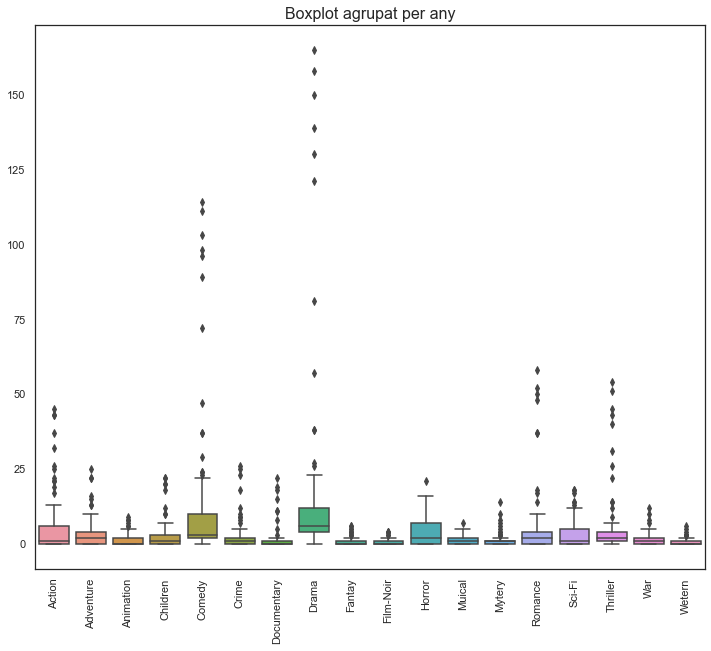

In [261]:

plt.figure(figsize=(12,10))
sns.boxplot(data=df_year).set_title("Boxplot agrupat per any", fontsize=16)
plt.xticks(rotation= 90)

plt.show()

In [264]:
df_decade = df_year.copy()
df_decade.reset_index(inplace=True)
df_decade['Year'] = pd.cut(df_decade['Year'], bins, labels=decade)
df_decade.rename(columns={'Year': 'Decade'}, inplace=True)
df_decade.tail(3)

,Decade,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantay,Film-Noir,Horror,Muical,Mytery,Romance,Sci-Fi,Thriller,War,Wetern
78,90,43,16,8,18,111,25,18,165,2,3,15,2,10,58,17,51,5,1
79,90,26,6,6,10,103,12,15,130,2,0,14,0,5,37,14,40,4,1
80,00,22,7,9,10,72,9,8,57,1,0,8,3,3,17,14,26,2,0


In [376]:
df_decade = df_decade.groupby('Decade')[df_dumi.columns].sum()
df_decade.tail(3)

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantay,Film-Noir,Horror,Muical,Mytery,Romance,Sci-Fi,Thriller,War,Wetern
Decade,,,,,,,,,,,,,,,,,,
80,110,78,14,31,200,21,9,211,24,4,112,12,11,54,65,55,31,3
90,297,129,51,138,741,139,105,1035,33,10,120,28,60,333,119,321,55,19
00,22,7,9,10,72,9,8,57,1,0,8,3,3,17,14,26,2,0


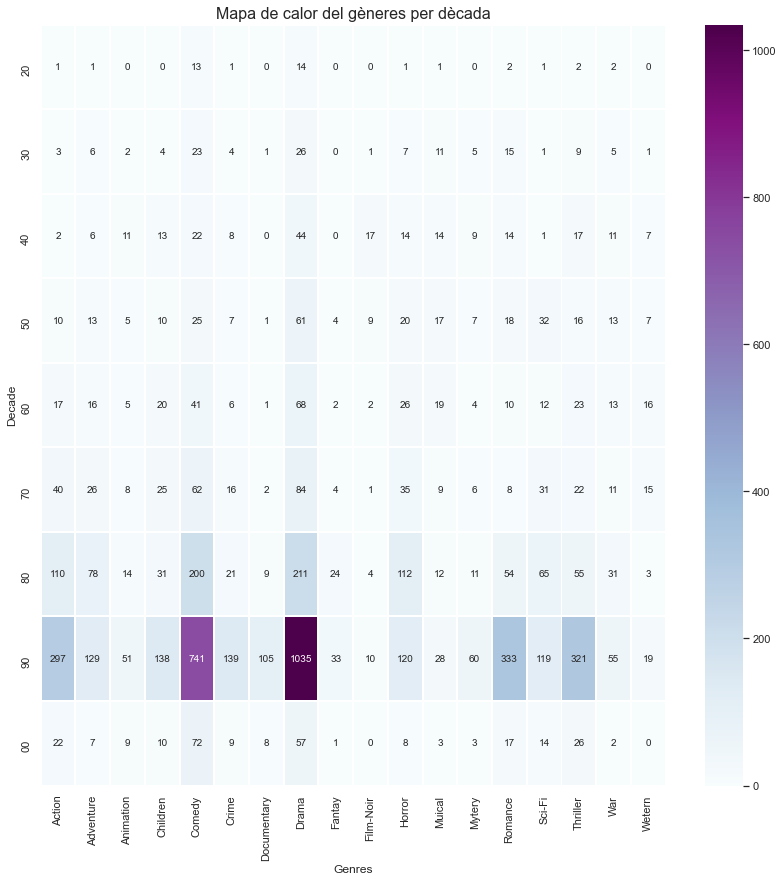

In [275]:
plt.figure(figsize=(14, 14))
sns.set_style('white')
ax = sns.heatmap(df_decade, annot=True, annot_kws={'size': 10}, fmt='.0f', linewidths=1, linecolor='w', cmap='BuPu')
plt.title("Mapa de calor del gèneres per dècada", fontdict={'fontsize':16})
plt.xlabel("Genres")
plt.ylabel("Decade")
plt.show()

## Exercici 3

Gràfiques i interpretacions del dataset [Movies](https://github.com/IT-Academy-BCN/Data-Science/tree/main/Data-sources)

In [377]:
data = pd.DataFrame()
for gen in df_dumi.columns:
    series = df_dumi[df_dumi[gen] == 1].apply(np.sum)
    series.rename(gen, inplace=True)
    data = data.append(series)
data

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantay,Film-Noir,Horror,Muical,Mytery,Romance,Sci-Fi,Thriller,War,Wetern
Action,503.0,128.0,4.0,13.0,65.0,55.0,0.0,100.0,15.0,0.0,25.0,3.0,12.0,35.0,107.0,133.0,46.0,10.0
Adventure,128.0,283.0,14.0,81.0,44.0,9.0,0.0,33.0,35.0,1.0,8.0,9.0,3.0,27.0,67.0,31.0,12.0,4.0
Animation,4.0,14.0,105.0,84.0,25.0,0.0,0.0,1.0,6.0,1.0,1.0,32.0,1.0,4.0,8.0,4.0,2.0,0.0
Children,13.0,81.0,84.0,251.0,93.0,0.0,0.0,27.0,38.0,0.0,1.0,37.0,2.0,7.0,14.0,1.0,2.0,2.0
Comedy,65.0,44.0,25.0,93.0,1200.0,36.0,4.0,226.0,19.0,1.0,41.0,41.0,13.0,204.0,31.0,31.0,18.0,17.0
Crime,55.0,9.0,0.0,0.0,36.0,211.0,0.0,90.0,1.0,15.0,6.0,0.0,13.0,9.0,6.0,58.0,0.0,0.0
Documentary,0.0,0.0,0.0,0.0,4.0,0.0,127.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
Drama,100.0,33.0,1.0,27.0,226.0,90.0,4.0,1603.0,9.0,6.0,12.0,15.0,32.0,204.0,23.0,110.0,76.0,13.0
Fantay,15.0,35.0,6.0,38.0,19.0,1.0,0.0,9.0,68.0,0.0,0.0,2.0,0.0,7.0,13.0,1.0,1.0,0.0
Film-Noir,0.0,1.0,1.0,0.0,1.0,15.0,0.0,6.0,0.0,44.0,1.0,0.0,8.0,1.0,2.0,20.0,0.0,0.0


In [309]:
pip install holoviews

  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.2.3
    Uninstalling bokeh-2.2.3:
      Successfully uninstalled bokeh-2.2.3
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 2.0.0
    Uninstalling importlib-metadata-2.0.0:
      Successfully uninstalled importlib-metadata-2.0.0
Note: you may need to restart the kernel to use updated packages.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

bokeh 2.4.3 requires typing-extensions>=3.10.0, but you'll have typing-extensions 3.7.4.3 which is incompatible.


In [382]:
pip install chord

Note: you may need to restart the kernel to use updated packages.


In [390]:
from chord import Chord

matrix=data.copy()

matrix = matrix.values.tolist()

genr = ['Action', 'Adventure', 'Animation',  'Children',  'Comedy', 'Crime', 'Documentary',  'Drama',  'Fantay',  
        'Film-Noir', 'Horror', 'Muical', 'Mytery', 'Romance', 'Sci-Fi', 'Thriller', 'War Wetern']

Chord(matrix, genr, colors='accent', reverse_gradients=True, curved_labels=True, arc_numbers=True).show()